In [1]:
# General:
#import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import csv

import time
#from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
import nltk
import re

In [3]:
file = 'testSentimen.csv'

In [4]:
# tentukan lokasi file, nama file, dan inisialisasi csv
f = open(file, 'r')
reader = csv.reader(f)

# membaca baris per baris
#for row in reader:
#	print (row)

# menutup file csv
f.close()
#print("DAFTAR YANG TELAH DIAMBIL")

In [5]:
#initialize stopWords
stopWords = []

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

#start getStopWordList
def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('AT_USER')
    stopWords.append('URL')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords
#end

In [6]:
#import regex
import re
#start process_tweet
def processTweet(tweet):
    # process the tweets
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet
#end

In [7]:
#start getfeatureVector
def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector
#end

In [8]:
#Read the tweets one by one and process it
fp = open('testSentimen.csv', encoding="utf8")
line = fp.readline()

stopWords = getStopWordList('stopwordsID.txt')

while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
    #print (featureVector)
    line = fp.readline()
#end loop
fp.close()
print()
#print("DAFTAR STOPWORD")
print()

In [9]:
import array as arr
import csv

#Read the tweets one by one and process it
inpTweets = csv.reader(open('testSentimen.csv', encoding="utf8"), delimiter=',', quotechar='|')
tweets = []
featureList = []
for row in inpTweets:
    sentiment = row[0]
    tweet = row[1]
    processedTweet = processTweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    tweets.append((featureVector, sentiment))
    featureList = featureList + featureVector
#end loop
#print("FEATURE LIST")
print()
#print (tweets)
#print (featureList)

In [10]:
#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

ini = processTweet('paket belum juga sampai')
ini2 = getFeatureVector(ini)
ini3 = extract_features(ini2)
#print (ini3)
pos = 0
neg = 0
neu = 0

In [11]:
#Read the tweets one by one and process it
fp = open('testSentimen.csv', encoding="utf8")
line = fp.readline()


stopWords = getStopWordList('stopwordsID.txt')

#end loop
#fp.close()
import nltk.classify
# Remove featureList duplicates
featureList = list(set(featureList))

# Generate the training set
training_set = nltk.classify.util.apply_features(extract_features, tweets)

# Train the Naive Bayes classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)

# Test the classifier
#testTweet = 'baru saja donor darah, tangan saya masih sakit'
testTweet = 'ujaran'
processedTestTweet = processTweet(testTweet)
sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
print ("testTweet = %s, sentiment = %s\n" % (testTweet, sentiment))
x = 0
sentimen=[]
while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
#    #print (featureVector)
    line = fp.readline()
    testTweet = processedTweet
    processedTestTweet = processTweet(testTweet)
    sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
    sentimen.append(sentiment)
    print ("testTweet = %s, sentiment = %s\n" % (featureVector, sentiment))
    
    myData=featureVector
    x = x + 1
    if sentiment == 'positive':
        pos = 1 + pos
    elif sentiment == 'negative':
        neg = 1 + neg
    elif sentiment == 'neutral':
        neu = 1 + neu
        
print(x)
print()
print("ANALISIS SENTIMEN")
print()


testTweet = ujaran, sentiment = neutral

testTweet = ['pos', 'kargo', 'kakak', 'pengiriman', 'murah', 'rival', 'rival'], sentiment = positive

testTweet = ['resi'], sentiment = neutral

testTweet = ['kantor', 'nanya', 'kah', 'pengiriman', 'paket', 'pakistan', 'biaya', 'perkg', 'terimakasih', 'jawabannya'], sentiment = positive

testTweet = ['paket', 'lum', 'brendingnya', 'pek'], sentiment = positive

testTweet = ['cek', 'paket', 'nmr', 'resi', 'dilacak', 'tgl', 'feb', 'selanjut', 'nya', 'ntah', 'nyangkut', 'dimana', 'krn', 'blm', 'kabar', 'berita'], sentiment = positive

testTweet = ['pos', 'indonesia', 'postingannya', 'kekininan', 'semoga', 'kedepan', 'bagus', 'salam', 'adminnya'], sentiment = neutral

testTweet = ['dana', 'cod', 'blm', 'dibayarkan', 'pos', 'menunda', 'kupon', 'undian', 'dapatkan'], sentiment = positive

testTweet = ['informasinya', 'alangkah', 'bagusnya', 'informasi', 'seputar', 'program', 'layanan', 'pos', 'ok', 'kantor', 'pos', 'kota', 'pos', 'dipelosok', 'dikawasa

testTweet = ['fp', 'resmi', 'pt', 'gak', 'centang', 'biru', 'min'], sentiment = negative

testTweet = ['lestari', 'purwaningsih', 'lacak', 'pake', 'google'], sentiment = negative

testTweet = ['dijawa', 'timur', 'pos', 'sungguh', 'bikin', 'geleng', 'kepala'], sentiment = negative

testTweet = ['info', 'kontak', 'kantor', 'pos', 'aimere'], sentiment = negative

testTweet = ['pos'], sentiment = neutral

testTweet = ['min', 'nomor', 'resi', 'tgl', 'stuck', 'gag', 'dikirim2', 'kedungdung', 'ditunggu', 'uangnya', 'tunggu', 'muter'], sentiment = neutral

testTweet = ['kirim', 'barang', 'pelanggan', 'tp', 'ga', 'no', 'rekening', 'solusinya'], sentiment = negative

testTweet = ['login', 'gini', 'mulu', 'ya'], sentiment = negative

testTweet = ['beruntung'], sentiment = neutral

testTweet = ['numpang', 'materai', 'udah', 'beredar', 'ya'], sentiment = negative

testTweet = ['ru844921849nl'], sentiment = neutral

testTweet = ['paket', 'blom', 'udah', 'tgl', 'januari', 'blom', 'nyampe'], sentiment

testTweet = ['pengalaman', 'alami', 'membaca', 'komentar', 'kebanyakan', 'kesalahan', 'kurir', 'kurir', 'mengantarkan', 'tujuan', 'perbaiki'], sentiment = positive

testTweet = ['gagal', 'udah'], sentiment = negative

testTweet = ['kreatif'], sentiment = positive

testTweet = ['info', 'manalp001213483id'], sentiment = positive

testTweet = ['indonesia', 'emang', 'the', 'best', 'besok', 'kirim', 'paket', 'diabetes', 'sulawesi', 'kalimantan', 'pake', 'pos', 'terima', 'kasih', 'pos', 'teruspaket', 'diabetes', 'dibeli', 'nomor', 'dibawah'], sentiment = positive

testTweet = ['nomor', 'plat', 'beda'], sentiment = neutral

testTweet = ['kirim', 'paket', 'swedia', 'biaya', 'nya'], sentiment = neutral

testTweet = ['kali', 'perjelas', 'ditindak', 'lanjuti', 'paket'], sentiment = neutral

testTweet = ['follow', 'up', 'gak', 'bergerak'], sentiment = positive

testTweet = ['nomor', 'resi18175646647diteruskan', 'kedungdung', 'knapa', 'nggk', 'sampai2', 'tgl'], sentiment = positive

testTweet = ['a

testTweet = ['no', 'ambon', 'tgl', 'manifes', 'serah', 'kantor', 'pos', 'daerah', 'masuk'], sentiment = positive

testTweet = ['ru831246500nl', 'gada', 'kejelasan', 'nih', 'paket', 'udh', 'kantor', 'pos', 'kabupaten', 'knp', 'pos', 'cirebon', 'sekerang', 'gda', 'kejelasan', 'paket', 'gimana', 'haduh'], sentiment = negative

testTweet = ['nih', 'nasibnya', 'paketku', 'lp189275514sg', 'terbenam', 'gudang', 'kali'], sentiment = negative

testTweet = ['pgm', 'nya', 'transfer', 'nama', 'jaga', 'loket', 'yaapa', 'gimana', 'biar', 'ikutan'], sentiment = negative

testTweet = [], sentiment = neutral

testTweet = ['paket', 'dr', 'new', 'delhi', 'sebulan', 'blm', 'status', 'custom', 'hold', 'gimana'], sentiment = positive

testTweet = ['pengiriman', 'pengiriman', 'tgl', 'bgt', 'tolong', 'tindak', 'lanjuti'], sentiment = neutral

testTweet = ['gimana', 'paket', 'pos', 'kabupaten', 'cirebon', 'ru831246500nl'], sentiment = neutral

testTweet = [], sentiment = neutral

testTweet = ['inbox', 'min'], 

In [12]:
print('Jumlah Sentiment Positive : ')
print(pos)
print('Jumlah Sentiment Negative : ')
print(neg)
print('Jumlah Sentiment Neutral :')
print(neu)

Jumlah Sentiment Positive : 
76
Jumlah Sentiment Negative : 
76
Jumlah Sentiment Neutral :
147


In [19]:
#Read the tweets one by one and process it
fp = open('testtopik.csv', encoding="utf8")
line = fp.readline()

stopWords = getStopWordList('stopwordsID.txt')

while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
    #print (featureVector)
    line = fp.readline()
#end loop
fp.close()

In [20]:
import array as arr
import csv

#Read the tweets one by one and process it
inpTweets = csv.reader(open('testtopik.csv', encoding="utf8"), delimiter=',', quotechar='|')
tweets = []
featureList = []
for row in inpTweets:
    sentiment = row[0]
    tweet = row[1]
    processedTweet = processTweet(tweet)
    featureVector = getFeatureVector(processedTweet)
    tweets.append((featureVector, sentiment))
    featureList = featureList + featureVector
#end loop
#print (tweets)
#print (featureList)

In [21]:
#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features
#end

ini = processTweet('paket belum juga sampai')
ini2 = getFeatureVector(ini)
ini3 = extract_features(ini2)
print (ini3)
kecewa = 0
layanan = 0
giat = 0
kecewapos = 0
kecewaneg = 0
kecewaneu = 0

layananpos = 0
layananneg = 0
layananneu = 0

giatpos = 0
giatneg = 0
giatneu = 0

{'contains(pos)': False, 'contains(kargo)': False, 'contains(kakak)': False, 'contains(cek)': False, 'contains(resi)': False, 'contains(dear)': False, 'contains(kantor)': False, 'contains(nanya)': False, 'contains(kah)': False, 'contains(pengiriman)': False, 'contains(paket)': True, 'contains(pakistan)': False, 'contains(biaya)': False, 'contains(perkg)': False, 'contains(terimakasih)': False, 'contains(jawabannya)': False, 'contains(maaf)': False, 'contains(lum)': False, 'contains(brendingnya)': False, 'contains(pek)': False, 'contains(tolong)': False, 'contains(nmr)': False, 'contains(dilacak)': False, 'contains(tgl)': False, 'contains(feb)': False, 'contains(mantap)': False, 'contains(indonesia)': False, 'contains(postingannya)': False, 'contains(kekininan)': False, 'contains(dana)': False, 'contains(cod)': False, 'contains(blm)': False, 'contains(dibayarkan)': False, 'contains(bagus)': False, 'contains(informasinya)': False, 'contains(alangkah)': False, 'contains(bagusnya)': False,

In [22]:
#Read the tweets one by one and process it
fp = open('testSentimen.csv', encoding="utf8")
line = fp.readline()


#stopWords = getStopWordList('data/feature_list/stopwordsID.txt')

#end loop
#fp.close()
import nltk.classify
# Remove featureList duplicates
featureList = list(set(featureList))

# Generate the training set
training_set = nltk.classify.util.apply_features(extract_features, tweets)

# Train the Naive Bayes classifier
NBClassifier = nltk.NaiveBayesClassifier.train(training_set)

# Test the classifier
#testTweet = 'baru saja donor darah, tangan saya masih sakit'
testTweet = 'ujaran'
processedTestTweet = processTweet(testTweet)
sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
#print ("testTweet = %s, sentiment = %s\n" % (testTweet, sentiment))
x = 0
topik=[]
while line:
    processedTweet = processTweet(line)
    featureVector = getFeatureVector(processedTweet)
#    #print (featureVector)
    line = fp.readline()
    testTweet = processedTweet
    processedTestTweet = processTweet(testTweet)
    sentiment = NBClassifier.classify(extract_features(getFeatureVector(processedTestTweet)))
    topik.append(sentiment)
    #print ("testTweet = %s, topik = %s, sentimen = %s\n" % (featureVector, sentiment,sentimen[x]))
    #print(sentimen[x])
    myData=featureVector
    x = x + 1
    if sentiment == 'KegiatanPengiriman':
        giat = 1 + giat
    elif sentiment == 'LayananPosIndonesia':
        layanan = 1 + layanan
    elif sentiment == 'KecewaTerhadapPengiriman':
        kecewa = 1 + kecewa
    
    
        
print()
print("KLASIFIKASI TOPIK")
print()
print(x)


KLASIFIKASI TOPIK

299


In [23]:
print('Jumlah Kegiatan Pengiriman : ')
print(giat)
print('Jumlah Layanan Pos Indonesia : ')
print(layanan)
print('Jumlah Kecewa Terhadap Pengiriman :')
print(kecewa)

Jumlah Kegiatan Pengiriman : 
124
Jumlah Layanan Pos Indonesia : 
170
Jumlah Kecewa Terhadap Pengiriman :
5


In [25]:
for i in range(len(sentimen)):
    #print(i, sentimen[i])
    if topik[i] == 'KegiatanPengiriman' and sentimen[i] == 'positive':
        giatpos = 1 + giatpos
    elif topik[i] == 'KegiatanPengiriman' and sentimen[i] == 'negative':
        giatneg = 1 + giatneg
    elif topik[i] == 'KegiatanPengiriman' and sentimen[i] == 'neutral':
        giatneu = 1 + giatneu
    elif topik[i] == 'LayananPosIndonesia' and sentimen[i] == 'positive':
        layananpos = 1 + layananpos
    elif topik[i] == 'LayananPosIndonesia' and sentimen[i] == 'negative':
        layananneg = 1 + layananneg
    elif topik[i] == 'LayananPosIndonesia' and sentimen[i] == 'neutral':
        layananneu = 1 + layananneu
    elif topik[i] == 'KecewaTerhadapPengiriman' and sentimen[i] == 'positive':
        kecewapos = 1 + kecewapos
    elif topik[i] == 'KecewaTerhadapPengiriman' and sentimen[i] == 'negative':
        kecewaneg = 1 + kecewaneg
    elif topik[i] == 'KecewaTerhadapPengiriman' and sentimen[i] == 'neutral':
        kecewaneu = 1 + kecewaneu

    #else:
 #       print ("No match")
 
print ("****************\n")

****************



In [26]:
print ("Layanan Pos Indonesia sentiment positive %s" % (layananpos))
print ("Layanan Pos Indonesia sentiment negative %s" % (layananneg))
print ("Layanan Pos Indonesia sentiment neutral %s" % (layananneu))
print ("\n")
print ("Kegiatan Pengiriman sentiment positive %s" % (giatpos))
print ("Kegiatan Pengiriman sentiment negative %s" % (giatneg))
print ("Kegiatan Pengiriman sentiment neutral %s" % (giatneu))
print ("\n")
print ("Kecewa Terhadap Pengiriman sentiment positive %s" % (kecewapos))
print ("Kecewa Terhadap Pengiriman sentiment negative %s" % (kecewaneg))
print ("Kecewa Terhadap Pengiriman sentiment neutral %s" % (kecewaneu))

Layanan Pos Indonesia sentiment positive 36
Layanan Pos Indonesia sentiment negative 57
Layanan Pos Indonesia sentiment neutral 133


Kegiatan Pengiriman sentiment positive 57
Kegiatan Pengiriman sentiment negative 46
Kegiatan Pengiriman sentiment neutral 70


Kecewa Terhadap Pengiriman sentiment positive 1
Kecewa Terhadap Pengiriman sentiment negative 4
Kecewa Terhadap Pengiriman sentiment neutral 0


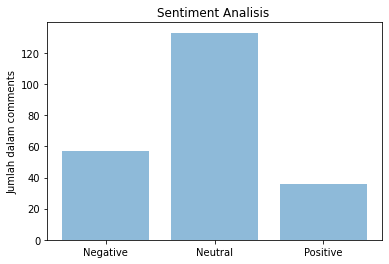

In [27]:
objects = ('Negative', 'Neutral', 'Positive')
y_pos = np.arange(len(objects))
performance = [layananneg, layananneu, layananpos]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Jumlah dalam comments')
plt.title('Sentiment Analisis ')
 
plt.show()

Layanan Pos Indonesia


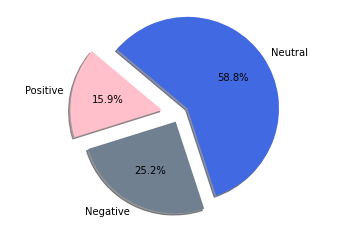

In [28]:
import matplotlib.pyplot as plt
 
# Data to plot
print('Layanan Pos Indonesia')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [layananpos, layananneg, layananneu]
colors = ['pink', 'slategray', 'royalblue']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Kecewa Terhadap Pengiriman


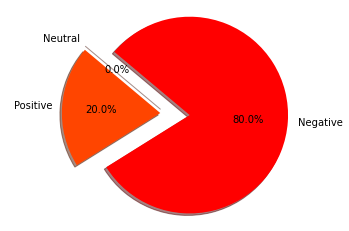

In [29]:
# Data to plot
print('Kecewa Terhadap Pengiriman')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [kecewapos, kecewaneg, kecewaneu]
colors = ['orangered', 'red', 'tomato']
explode = (0.1, 0.2, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Kegiatan Pengiriman


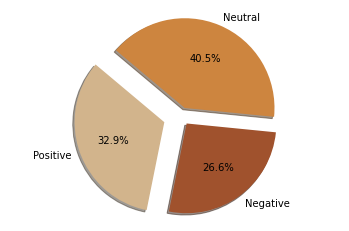

In [30]:
# Data to plot
print('Kegiatan Pengiriman')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [giatpos, giatneg, giatneu]
colors = ['tan', 'sienna', 'peru']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Analisis Sentimen


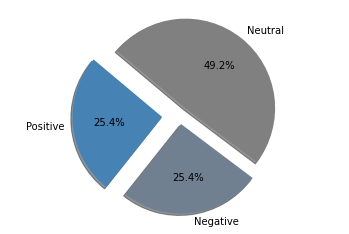

In [31]:
print('Analisis Sentimen')
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['steelblue', 'slategray', 'gray']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Klasifikasi Topik


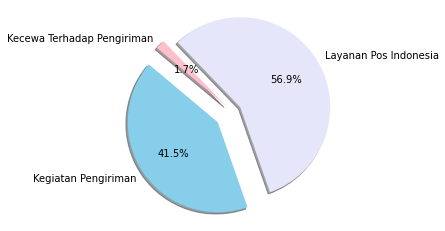

In [32]:
print('Klasifikasi Topik')
labels = 'Kegiatan Pengiriman', 'Layanan Pos Indonesia', 'Kecewa Terhadap Pengiriman'
sizes = [giat, layanan, kecewa]
colors = ['skyblue', 'lavender', 'pink']
explode = (0.2, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [33]:
datauji = pd.read_excel("testSentimen.xlsx")
datauji.head(300)

,Variable,Komentar,Nilai
0,|positive|,"|Kapan ada pos kargo kakak, supaya pengiriman ...",1
1,|positive|,|Cek resi sampai mana 17986231457|,1
2,|positive|,|Dear kantor pos.Mau nanya bisa kah pengiriman...,1
3,|positive|,|Maaf paket saya 27 hari kok lum sampai ..bren...,1
4,|positive|,|Tolong di cek paket dgn nmr resi 18257810714....,1
...,...,...,...
294,|negative|,"min, saya sudah mengajukan pertanyaan melalui ...",2
295,|neutral|,Halo kk selamat siangBisa cek resi ini18287404946,3
296,|positive|,Perlu dibenahi lagi,1
297,|neutral|,Ok,3


In [34]:
datauji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Variable  299 non-null    object
 1   Komentar  297 non-null    object
 2   Nilai     299 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.7+ KB


In [35]:
x = datauji.drop(["Variable", "Komentar"], axis=1)
x.head(300)

,Nilai
0,1
1,1
2,1
3,1
4,1
...,...
294,2
295,3
296,1
297,3


In [36]:
y = datauji["Variable"]
y.head(300)

0      |positive|
1      |positive|
2      |positive|
3      |positive|
4      |positive|
          ...    
294    |negative|
295     |neutral|
296    |positive|
297     |neutral|
298    |negative|
Name: Variable, Length: 299, dtype: object

In [38]:
y_uji = datauji["Variable"]
y_uji.head(11)

0     |positive|
1     |positive|
2     |positive|
3     |positive|
4     |positive|
5     |positive|
6     |positive|
7     |positive|
8     |positive|
9     |positive|
10    |positive|
Name: Variable, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x, y)
datauji = pd.read_excel("testSentimen.xlsx")
datauji.head(300)

,Variable,Komentar,Nilai
0,|positive|,"|Kapan ada pos kargo kakak, supaya pengiriman ...",1
1,|positive|,|Cek resi sampai mana 17986231457|,1
2,|positive|,|Dear kantor pos.Mau nanya bisa kah pengiriman...,1
3,|positive|,|Maaf paket saya 27 hari kok lum sampai ..bren...,1
4,|positive|,|Tolong di cek paket dgn nmr resi 18257810714....,1
...,...,...,...
294,|negative|,"min, saya sudah mengajukan pertanyaan melalui ...",2
295,|neutral|,Halo kk selamat siangBisa cek resi ini18287404946,3
296,|positive|,Perlu dibenahi lagi,1
297,|neutral|,Ok,3


In [40]:
x_test = datauji.drop(["Variable", "Komentar"], axis=1)
x_test.head(300)

,Nilai
0,1
1,1
2,1
3,1
4,1
...,...
294,2
295,3
296,1
297,3


In [41]:
y_uji = datauji["Variable"]
y_uji.head(300)

0      |positive|
1      |positive|
2      |positive|
3      |positive|
4      |positive|
          ...    
294    |negative|
295     |neutral|
296    |positive|
297     |neutral|
298    |negative|
Name: Variable, Length: 299, dtype: object

In [42]:
Y_predict = nbtrain.predict(x_test)
print("Prediksi Naive Bayes : ",Y_predict)

Prediksi Naive Bayes :  ['|positive|' '|positive|' '|positive|' '|positive|' '|positive|'
 '|positive|' '|positive|' '|positive|' '|positive|' '|positive|'
 '|positive|' '|positive|' '|positive|' '|positive|' '|positive|'
 '|positive|' '|positive|' '|positive|' '|positive|' '|positive|'
 '|positive|' '|positive|' '|positive|' '|positive|' '|positive|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|' '|neutral|'
 '|negative|' '|negative|' '|negative|' '|negative|' '|negative|'
 '|negative|' '|negative|' '|negative|' '|negative|' '|negative|'
 '|

In [43]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_uji, Y_predict)
print("Akurasi Naive Bayes : ",accuracy)

Akurasi Naive Bayes :  0.9933110367892977


In [44]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_uji, Y_predict))

              precision    recall  f1-score   support

  |negative|       0.99      0.99      0.99        92
   |neutral|       1.00      1.00      1.00       104
  |positive|       0.99      0.99      0.99       103

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



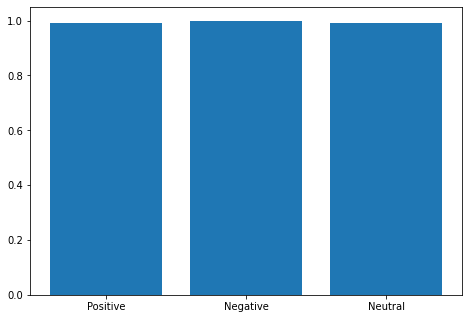

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
TingkatAkurasi = ['Positive', 'Negative', 'Neutral']
Nilai = [0.99,1.00,0.99]
ax.bar(TingkatAkurasi,Nilai)
plt.show()

In [46]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [47]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

array([72., 82., 85.])

In [48]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array(['|neutral|', '|neutral|', '|neutral|', '|positive|', '|neutral|',
       '|neutral|', '|positive|', '|positive|', '|positive|',
       '|negative|', '|positive|', '|negative|', '|neutral|',
       '|positive|', '|neutral|', '|negative|', '|neutral|', '|negative|',
       '|neutral|', '|negative|', '|positive|', '|neutral|', '|negative|',
       '|positive|', '|neutral|', '|negative|', '|negative|',
       '|positive|', '|negative|', '|positive|', '|positive|',
       '|neutral|', '|positive|', '|neutral|', '|neutral|', '|positive|',
       '|negative|', '|negative|', '|neutral|', '|neutral|', '|negative|',
       '|neutral|', '|neutral|', '|neutral|', '|negative|', '|neutral|',
       '|negative|', '|neutral|', '|negative|', '|negative|', '|neutral|',
       '|positive|', '|positive|', '|positive|', '|negative|',
       '|negative|', '|negative|', '|positive|', '|negative|',
       '|positive|'], dtype='<U10')

In [49]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [3.00240571e-16, 0.00000000e+00, 1.00000000e+00],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [3.00240571e-16, 0.00000000e+00, 1.00000000e+00],
       [3.00240571e-16, 0.00000000e+00, 1.00000000e+00],
       [3.00240571e-16, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 7.41914153e-19],
       [3.00240571e-16, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 7.41914153e-19],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [3.00240571e-16, 0.00000000e+00, 1.00000000e+00],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [1.00000000e+00, 0.00000000e+00, 7.41914153e-19],
       [9.97829599e-21, 1.00000000e+00, 3.73552876e-78],
       [1.00000000e+00, 0.00000

In [50]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0, 22,  0],
       [ 0,  0, 18]], dtype=int64)

In [51]:
# Merapikan hasil confusion matrix
y_actual1 = pd.Series([1, 0,1,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0], name = "actual")
y_pred1 = pd.Series([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], name = "prediction")
df_confusion = pd.crosstab(y_actual1, y_pred1)
df_confusion

prediction,0,1
actual,,
0,7,2
1,1,8


In [52]:
import pandas as pd 
import numpy as np

dataset = pd.read_csv("dataset.csv", usecols=["Nilai", "Komentar"])
dataset.columns = ["label", "komentar"]

dataset.head()

,label,komentar
0,1,"['pos', 'kargo', 'kakak', 'pengiriman', 'murah..."
1,1,['resi']
2,0,"['pengiriman', 'pengiriman', 'tgl', 'bgt', 'to..."
3,1,"['gabung', 'pt', 'pos', 'indonesia', 'ngelamar..."
4,0,"['nomor', 'resi', 'sudh', 'loncat', 'eta', 'to..."


In [53]:
import ast

def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

dataset["komentar_list"] = dataset["komentar"].apply(convert_text_list)


print(dataset["komentar_list"][4])

print("\ntype : ", type(dataset["komentar_list"][4]))

['nomor', 'resi', 'sudh', 'loncat', 'eta', 'tolonglah', 'profesionalnya', 'blog', 'pos', 'indo', 'blm', 'update']

type :  <class 'list'>


In [54]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

dataset["TF_dict"] = dataset['komentar_list'].apply(calc_TF)

dataset["TF_dict"].head()

0    {'pos': 0.14285714285714285, 'kargo': 0.142857...
1                                        {'resi': 1.0}
2    {'pengiriman': 0.2857142857142857, 'tgl': 0.14...
3    {'gabung': 0.14285714285714285, 'pt': 0.142857...
4    {'nomor': 0.08333333333333333, 'resi': 0.08333...
Name: TF_dict, dtype: object

In [55]:
# Check TF result
index = 4

print('%20s' % "term", "\t", "TF\n")
for key in dataset["TF_dict"][index]:
    print('%20s' % key, "\t", dataset["TF_dict"][index][key])

                term 	 TF

               nomor 	 0.08333333333333333
                resi 	 0.08333333333333333
                sudh 	 0.08333333333333333
              loncat 	 0.08333333333333333
                 eta 	 0.08333333333333333
           tolonglah 	 0.08333333333333333
      profesionalnya 	 0.08333333333333333
                blog 	 0.08333333333333333
                 pos 	 0.08333333333333333
                indo 	 0.08333333333333333
                 blm 	 0.08333333333333333
              update 	 0.08333333333333333


In [56]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(dataset["TF_dict"])

In [57]:
n_document = len(dataset)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict
  
#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

In [58]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
dataset["TF-IDF_dict"] = dataset["TF_dict"].apply(calc_TF_IDF)

In [59]:
# Check TF-IDF result
index = 4

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in dataset["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", dataset["TF_dict"][index][key] ,"\t" , dataset["TF-IDF_dict"][index][key])


                term 	         TF 	              TF-IDF

               nomor 	 0.08333333333333333 	 0.07635756098951292
                resi 	 0.08333333333333333 	 0.04256880198049923
                sudh 	 0.08333333333333333 	 0.07635756098951292
              loncat 	 0.08333333333333333 	 0.07635756098951292
                 eta 	 0.08333333333333333 	 0.07635756098951292
           tolonglah 	 0.08333333333333333 	 0.07635756098951292
      profesionalnya 	 0.08333333333333333 	 0.07635756098951292
                blog 	 0.08333333333333333 	 0.07635756098951292
                 pos 	 0.08333333333333333 	 0.018595295942850813
                indo 	 0.08333333333333333 	 0.07635756098951292
                 blm 	 0.08333333333333333 	 0.07635756098951292
              update 	 0.08333333333333333 	 0.07635756098951292
